In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
directory = '../../Datasets/H1B_Visa/'
h1b = pd.read_csv(directory + 'h1b_kaggle.csv')

In [3]:
h1b.dropna(subset=['YEAR'], inplace=True)
h1b.isnull().sum()

Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME             46
SOC_NAME               17721
JOB_TITLE                 30
FULL_TIME_POSITION         2
PREVAILING_WAGE           72
YEAR                       0
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [4]:
h1b['YEAR']= h1b['YEAR'].astype(int)

* **CASE_STATUS**: Status associated with the last significant event or decision. Valid values include “Certified,” “Certified-Withdrawn,” Denied,” and “Withdrawn”.
* **EMPLOYER_NAME**: Name of employer submitting labor condition application.
* **SOC_NAME**: Occupational name associated with the SOC_CODE. SOC_CODE is the occupational code associated with the job being requested for temporary labor condition, as classified by the Standard Occupational Classification (SOC) System.
* **JOB_TITLE**: Title of the job
* **FULL_TIME_POSITION**: Y = Full Time Position; N = Part Time Position
* **PREVAILING_WAGE**: Prevailing Wage for the job being requested for temporary labor condition. The wage is listed at annual scale in USD. The prevailing wage for a job position is defined as the average wage paid to similarly employed workers in the requested occupation in the area of intended employment. The prevailing wage is based on the employer’s minimum requirements for the position.
* **YEAR**: Year in which the H-1B visa petition was filed
* **WORKSITE**: City and State information of the foreign worker's intended area of employment
* **lon**: longitude of the Worksite
* **lat**: latitude of the Worksite

### Some questions to be answered:

* Which job titles are the most common ones for H1B visa petitions?
* What are the distributions of approved and denied petitions in different years and for different companies?
* Which employers have the most number of petitions for part-time jobs?
* Which states (or regions) have the most number of petitions?
* Which part of the US has the most Hardware/Software Engineer jobs? 
* Which industry has the most number of Data Scientist positions? 

# Job titles that have the most number of petitions

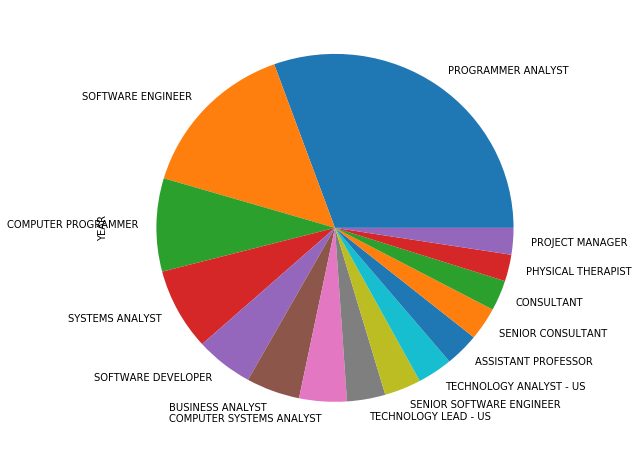

In [5]:
plt.figure(figsize=[8, 8])

h1b.groupby(['JOB_TITLE']).count().YEAR.nlargest(15).plot(kind='pie')

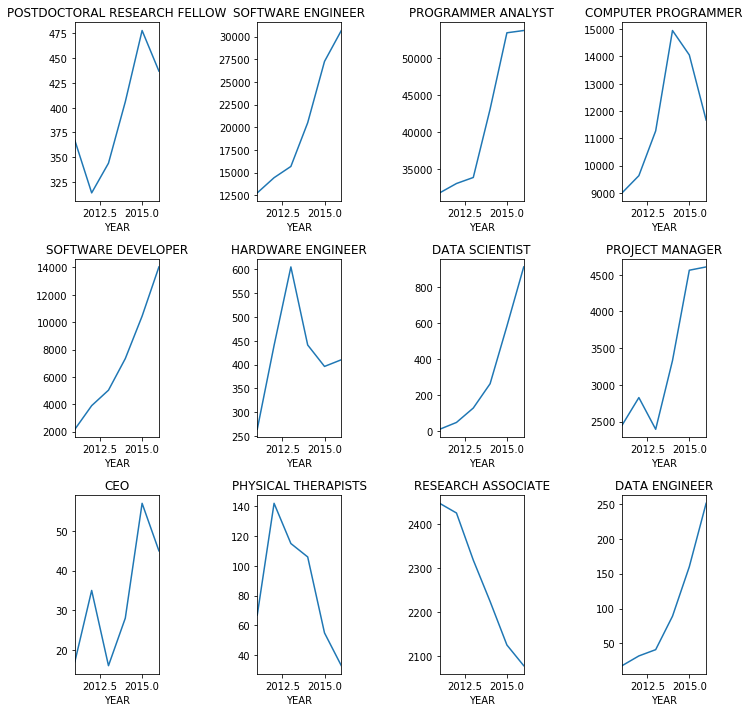

In [6]:
titles = ['POSTDOCTORAL RESEARCH FELLOW', 'SOFTWARE ENGINEER', 'PROGRAMMER ANALYST', 'COMPUTER PROGRAMMER', 'SOFTWARE DEVELOPER', 
         'HARDWARE ENGINEER', 'DATA SCIENTIST', 'PROJECT MANAGER', 'CEO', 'PHYSICAL THERAPISTS', 'RESEARCH ASSOCIATE',
         'DATA ENGINEER']
hsize = 3
wsize = 4
f, ax = plt.subplots(hsize,wsize,figsize=[10, 10])
for i in range(0,hsize):
    for j in range(0,wsize):
        h1b[h1b.JOB_TITLE==titles[i*wsize + j]].groupby('YEAR').count().JOB_TITLE.plot(ax=ax[i][j], title=titles[i*wsize + j])
plt.tight_layout() 

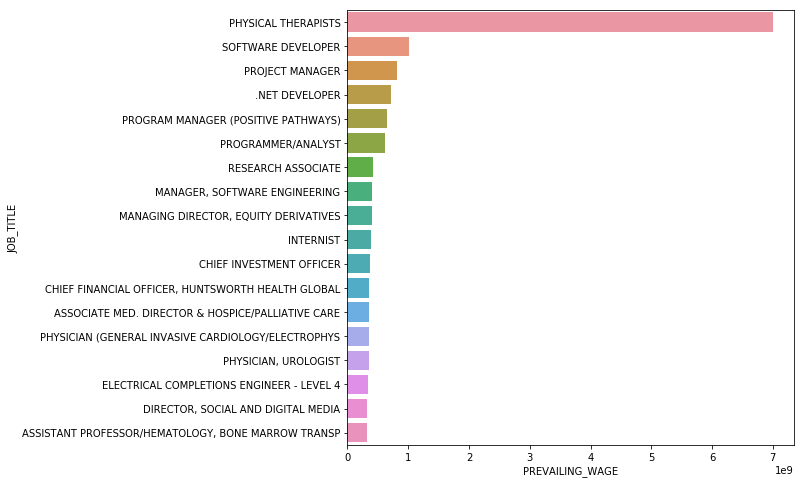

In [7]:
plt.figure(figsize=[8, 8])
df=h1b[['JOB_TITLE', 'PREVAILING_WAGE']].nlargest(20, 'PREVAILING_WAGE').reset_index(drop=True)
sns.barplot(y='JOB_TITLE', x='PREVAILING_WAGE', data=df)

# Analysis of Case Status

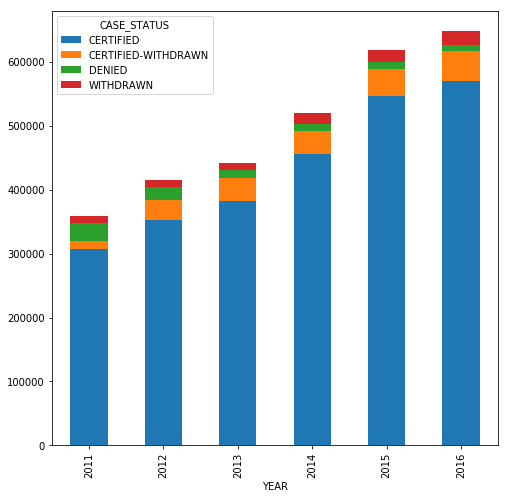

In [8]:
df = h1b.groupby(['YEAR', 'CASE_STATUS'])['YEAR'].count().unstack('CASE_STATUS')
for col in df.columns:
    if col not in ['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'WITHDRAWN']:
        df.drop(col, axis=1, inplace=True)

df.plot(kind='bar', stacked=True, figsize=[8, 8])

### Companies with the most 'DENIED' petitions

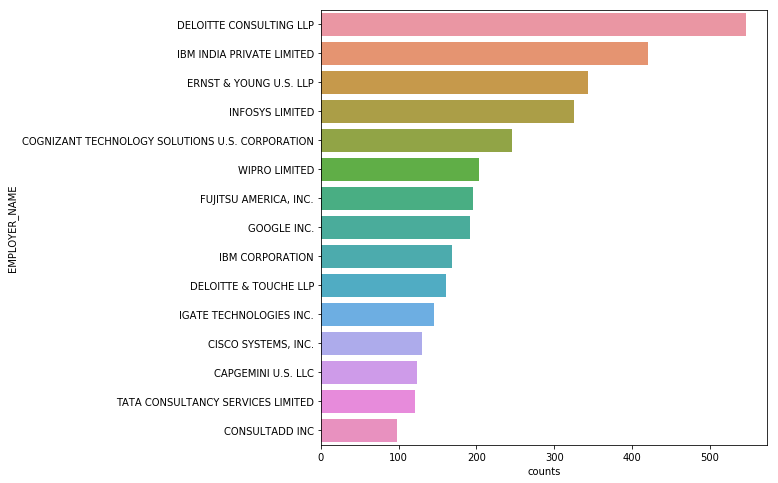

In [63]:
plt.figure(figsize=[8, 8])
df = h1b[h1b.CASE_STATUS=='DENIED'].groupby('EMPLOYER_NAME')['YEAR'].count().nlargest(15).reset_index(name='counts')
sns.barplot(y="EMPLOYER_NAME", x="counts", data=df)

### Companies with the most 'CERTIFIED' petitions

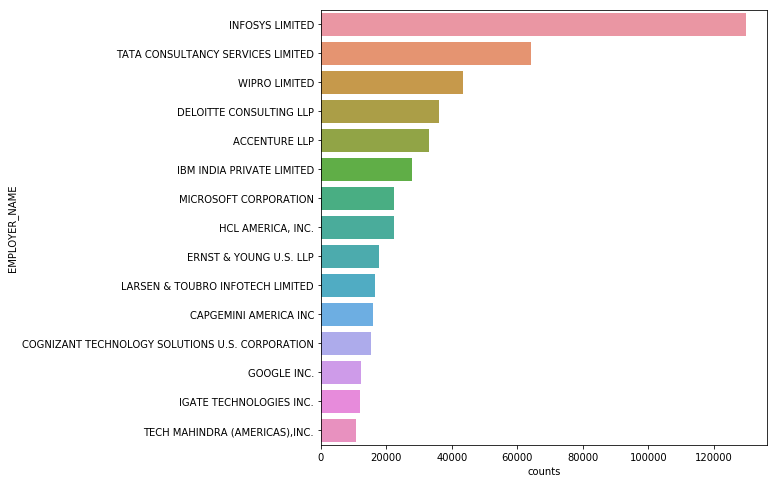

In [62]:
plt.figure(figsize=[8, 8])
df = h1b[h1b.CASE_STATUS=='CERTIFIED'].groupby('EMPLOYER_NAME').count().YEAR.nlargest(15).reset_index(name='counts')
sns.barplot(y="EMPLOYER_NAME", x="counts", data=df)

### Companies with the most 'WITHDRAWN' petitions

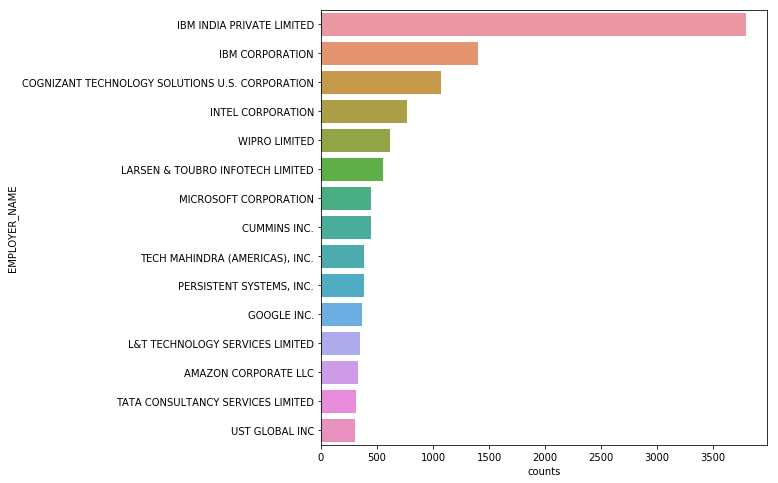

In [61]:
plt.figure(figsize=[8, 8])
df = h1b[h1b.CASE_STATUS=='WITHDRAWN'].groupby('EMPLOYER_NAME').count().YEAR.nlargest(15).reset_index(name='counts')
sns.barplot(y="EMPLOYER_NAME", x="counts", data=df)

# FULL-TIME or PART-TIME?

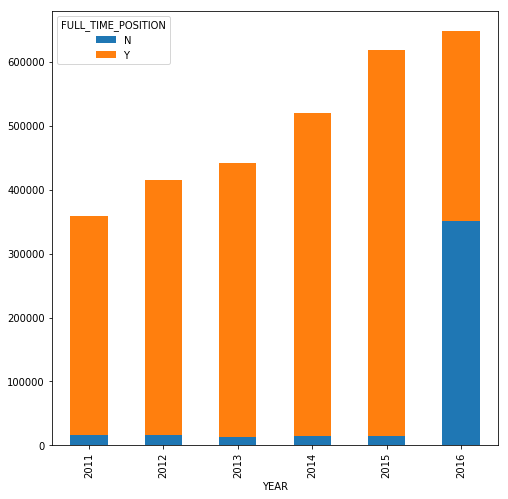

In [12]:
df = h1b.groupby(['YEAR', 'FULL_TIME_POSITION'])['YEAR'].count().unstack('FULL_TIME_POSITION')
df.plot(kind='bar', stacked=True, figsize=[8, 8])

### Companies with the most number of part-time petitions

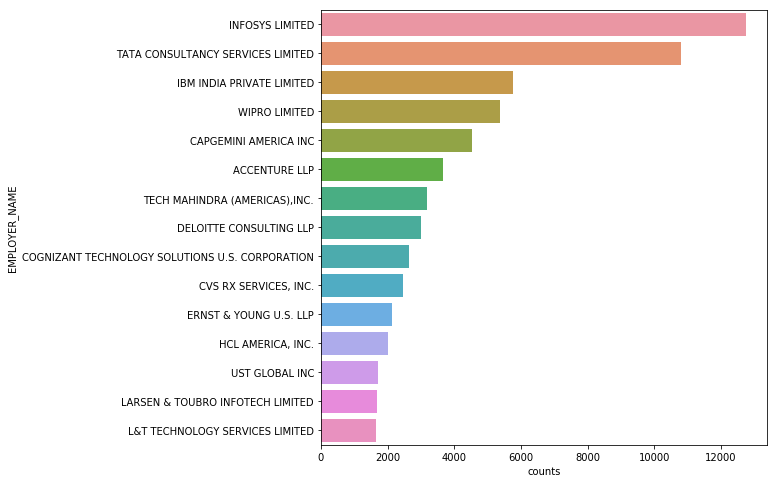

In [64]:
plt.figure(figsize=[8, 8])
df=h1b[h1b.FULL_TIME_POSITION=='N'].groupby('EMPLOYER_NAME').count().YEAR.nlargest(15).reset_index(name='counts')
sns.barplot(y="EMPLOYER_NAME", x="counts", data=df)

### Worksites with the most number of part-time petitions

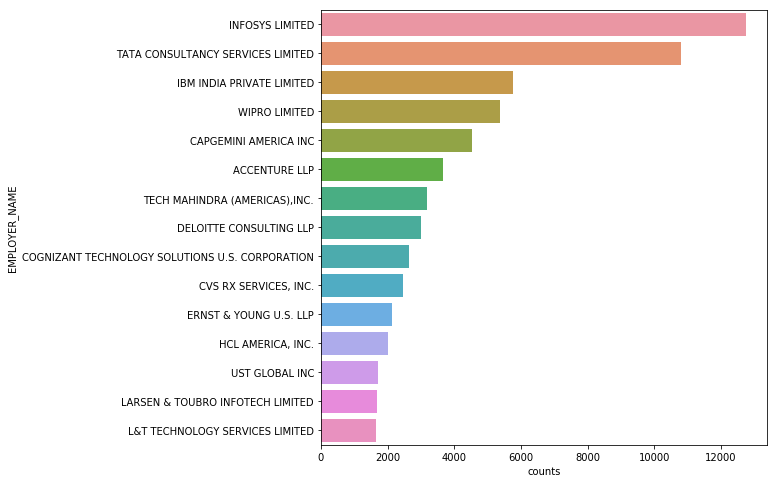

In [65]:

plt.figure(figsize=[8, 8])
h1b[h1b.FULL_TIME_POSITION=='N'].groupby('WORKSITE').count().YEAR.nlargest(15).reset_index(name='counts')
sns.barplot(y="EMPLOYER_NAME", x="counts", data=df)

# Worksite distribution

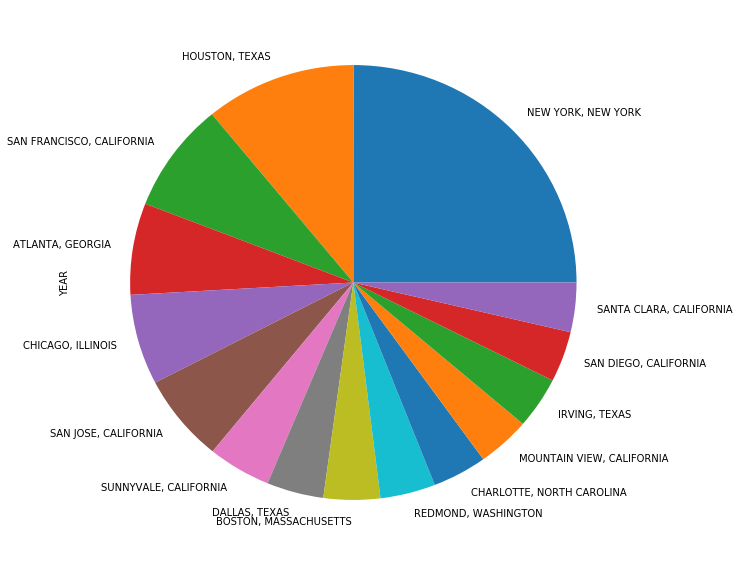

In [15]:
plt.figure(figsize=[10, 10])

h1b.groupby(['WORKSITE'])['YEAR'].count().nlargest(15).plot(kind='pie')

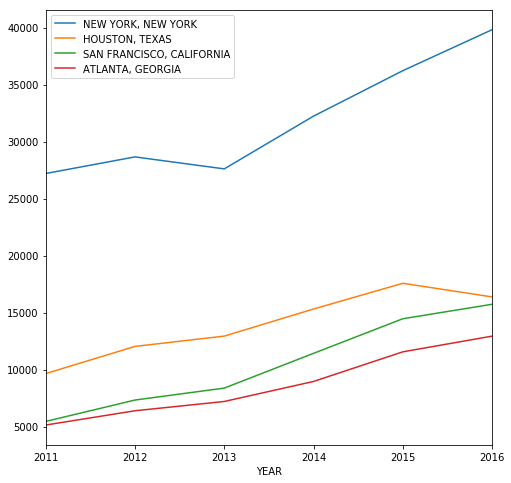

In [17]:
Sites = ['NEW YORK, NEW YORK', 'HOUSTON, TEXAS', 'SAN FRANCISCO, CALIFORNIA', 'ATLANTA, GEORGIA']
hsize = 2
wsize = 2
fig, ax = plt.subplots(figsize=[8, 8])
for i in range(0,hsize):
    for j in range(0,wsize):
        h1b[h1b.WORKSITE==Sites[i*wsize + j]].groupby('YEAR').agg('count').JOB_TITLE.plot(ax=ax)
ax.legend(Sites)

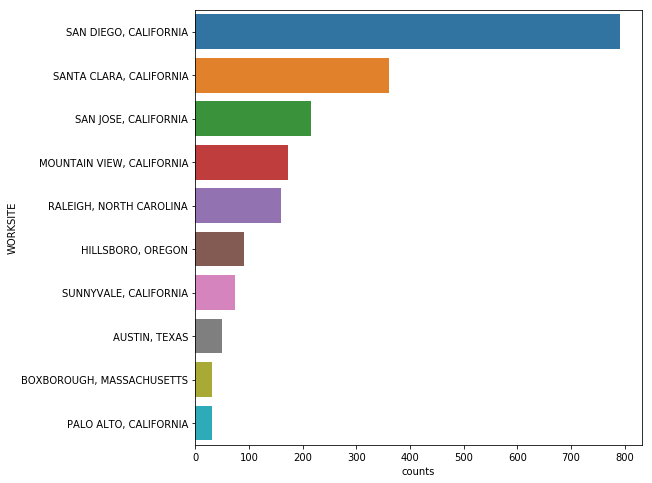

In [66]:
plt.figure(figsize=[8, 8])
df = h1b[h1b.JOB_TITLE=='HARDWARE ENGINEER'].groupby('WORKSITE').count().YEAR.nlargest(10).reset_index(name='counts')
sns.barplot(y="WORKSITE", x="counts", data=df)

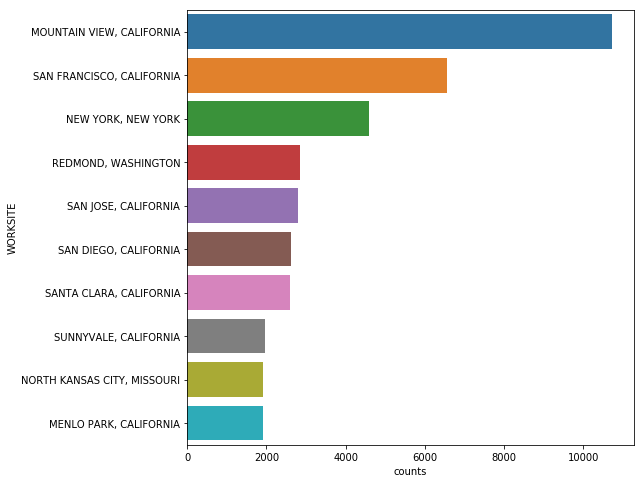

In [67]:
plt.figure(figsize=[8, 8])
df = h1b[h1b.JOB_TITLE=='SOFTWARE ENGINEER'].groupby('WORKSITE').count().YEAR.nlargest(10).reset_index(name='counts')
sns.barplot(y="WORKSITE", x="counts", data=df)

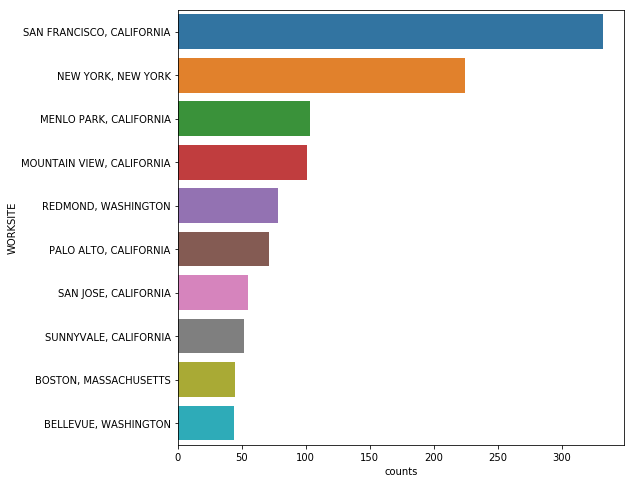

In [68]:
plt.figure(figsize=[8, 8])
df = h1b[h1b.JOB_TITLE=='DATA SCIENTIST'].groupby('WORKSITE').count().YEAR.nlargest(10).reset_index(name='counts')
sns.barplot(y="WORKSITE", x="counts", data=df)

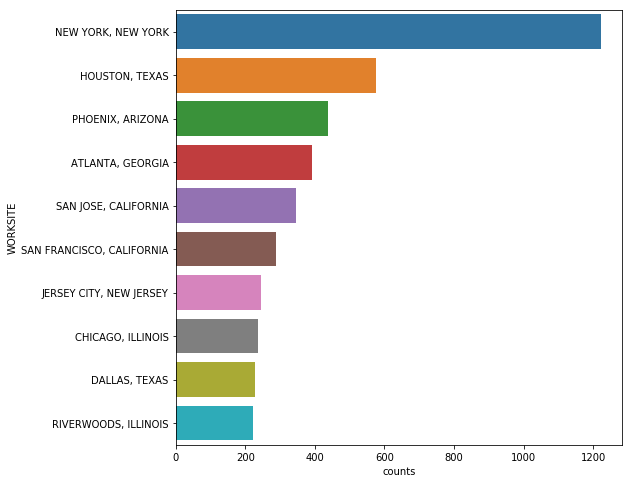

In [69]:
plt.figure(figsize=[8, 8])
df = h1b[h1b.JOB_TITLE=='PROJECT MANAGER'].groupby('WORKSITE').count().YEAR.nlargest(10).reset_index(name='counts')
sns.barplot(y="WORKSITE", x="counts", data=df)

# Job titles per employer

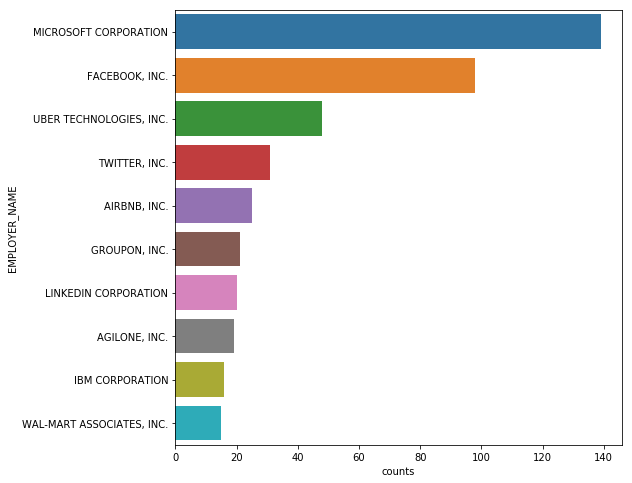

In [70]:
plt.figure(figsize=[8, 8])
df = h1b[h1b.JOB_TITLE=='DATA SCIENTIST'].groupby('EMPLOYER_NAME').count().YEAR.nlargest(10).reset_index(name='counts')
sns.barplot(y="EMPLOYER_NAME", x="counts", data=df)

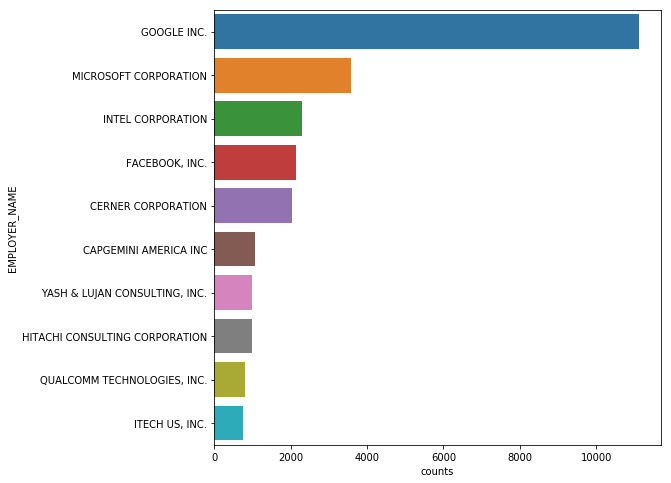

In [72]:
plt.figure(figsize=[8, 8])
df = h1b[h1b.JOB_TITLE=='SOFTWARE ENGINEER'].groupby('EMPLOYER_NAME').count().YEAR.nlargest(10).reset_index(name='counts')
sns.barplot(y="EMPLOYER_NAME", x="counts", data=df)

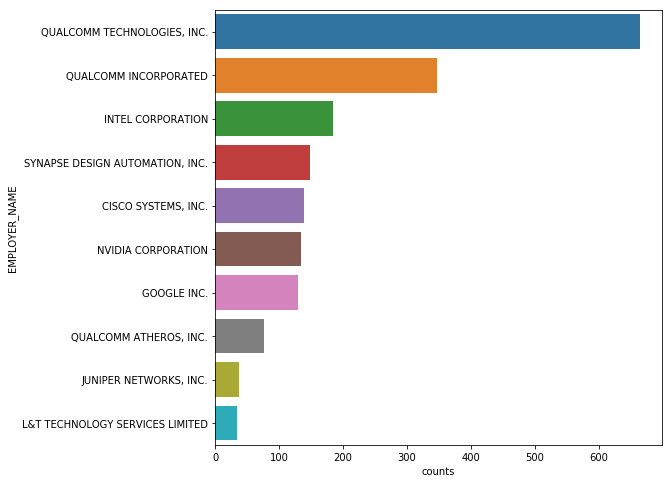

In [73]:
plt.figure(figsize=[8, 8])
df = h1b[h1b.JOB_TITLE=='HARDWARE ENGINEER'].groupby('EMPLOYER_NAME').count().YEAR.nlargest(10).reset_index(name='counts')
sns.barplot(y="EMPLOYER_NAME", x="counts", data=df)

# Locations of petitions

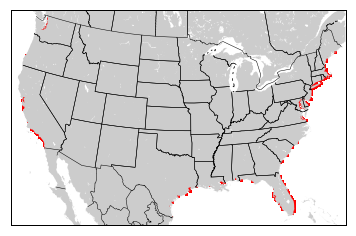

In [81]:
from mpl_toolkits.basemap import Basemap
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95, resolution='f')

map.drawmapboundary()
map.fillcontinents()
map.drawcountries()
map.drawstates()

x, y = map(list(h1b["lon"].astype(float)), list(h1b["lat"].astype(float)))
map.scatter(x,y,1,marker='o',color='red')
plt.show()